# Исследование надежности заемщиков


## Содержание проекта

1.  Цели и задачи проекта

2.  Загрузка и изучение данных

3.  Предобработка данных

  - 3.1  Удаление пропусков
  - 3.2  Обработка аномальных значений
  - 3.3  Удаление пропусков (продолжение)
  - 3.4  Изменение типов данных
  - 3.5  Обработка дубликатов
  - 3.6  Категоризация данных
  
4.  Исследование данных

  - 4.1  Есть ли зависимость между количеством детей и возвратом кредита в срок?
  - 4.2  Есть ли зависимость между семейным положением и возвратом кредита в срок?
  - 4.3  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
  - 4.4  Как разные цели кредита влияют на его возврат в срок?
  - 4.5  Возможные причины появления пропусков в исходных данных
  - 4.5.1  Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных?
  
5.  Общий вывод

## Цели и задачи проекта

**Заказчик** — кредитный отдел банка. На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок.

**Входные данные** - от банка — статистика о платёжеспособности клиентов в одном CSV-файле.

**Задачи:**
Выяснить:
1. Влияет ли количество детей на факт погашения кредита в срок?
2. Влияет ли семейное положение на факт погашения кредита в срок?
3. Влияет ли уровень дохода на факт погашения кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

**План работы:**
- изучить данные;
- предобработать входные данные;
- предоставить раздельные ответы по каждой задаче;
- сделать общий вывод.

In [1]:
# импорты и настройки
import pandas as pd
import seaborn as sb
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# функции

## категоризация по доходу
def categorize_income(income):
    try:
        if income <= 30000:
            return 'E'
        elif income <= 50000:
            return 'D'
        elif income <= 200000:
            return 'C'
        elif income <= 1000000:
            return 'B'
        elif income > 100000:
            return 'A'
    except:
        pass

## категоризация по цели кредита   
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

## Загрузка и изучение данных

Загрузим данные из csv-файла в датафрейм и сохраним в переменную `data`.

In [3]:
data = pd.read_csv('data/data.csv')

**Посмотрим на данные**

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Предоставлены следующие данные:**
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Предобработка данных

In [6]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца.**

In [7]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**В двух столбцах есть пропущенные значения.**

Один из них — `days_employed`. Пропуски в этом столбце мы обработаем на следующем этапе.

Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` будет заполнен медианным доходом среди всех записей с тем же типом.

In [8]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Избавились от пропусков в столбце `total_income`, заполнив медианным доходом среди всех записей с тем же типом.

### Обработка аномальных значений

In [9]:
data['days_employed']

0         -8437.673028
1         -4024.803754
2         -5623.422610
3         -4124.747207
4        340266.072047
             ...      
21520     -4529.316663
21521    343937.404131
21522     -2113.346888
21523     -3112.481705
21524     -1984.507589
Name: days_employed, Length: 21525, dtype: float64

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке.**

Таким артефактом, например, является отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально.

Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [10]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [11]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Выведем перечень уникальных значений столбца `children`.**

In [12]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения.

In [13]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [14]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [15]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Убедимся, что все пропуски заполнены. Выведеи количество пропущенных значений для каждого столбца.**

In [16]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [17]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Обработаем неявные дубликаты в столбце `education`.**

В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.

In [18]:
data['education'] = data['education'].str.lower()

**Выведем количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [19]:
data.duplicated().sum()

71

In [20]:
data = data.drop_duplicates()

### Категоризация данных

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 назначим категорию `'E'`, а клиенту, получающему 235000, — `'B'`.**

Используем собственную функцию с именем `categorize_income()` и метод `apply()`.

In [21]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [22]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**С помощью собственной функции, на основании данных из столбца `purpose`, сформируем новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

**ПРОВЕРИМ КАТЕГОРИИ:**

In [24]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


## Исследование данных

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [25]:
debt_no_children = data.loc[data['children']==0]['debt'].mean()
debt_with_children = data.loc[data['children']>0]['debt'].mean()
print()
print(f'{debt_no_children:.2%} просрочек у клиентов без детей.')
print(f'{debt_with_children:.2%} просрочек у клиентов c детьми.')


7.54% просрочек у клиентов без детей.
9.24% просрочек у клиентов c детьми.


**Как мы видим, клиенты без детей чаще возвращают кредиты в срок.**

**Посмотрим на статистику задолжностей по возврату кредитов в зависимости от количества детей:**

In [26]:
table_df = data.pivot_table(
    index = ['children'], values = 'debt', aggfunc = ('mean', 'count'))
table_df['count'] = table_df['count'].apply(round)
table_df = table_df.rename(columns={'count':'Клиентов','mean':'Просрочки'})
table_df.index.names = ['Детей']
table_df.style.format({'Просрочки': '{0:.2%}'})

,Клиентов,Просрочки
Детей,,
0,14091,7.54%
1,4808,9.23%
2,2052,9.45%
3,330,8.18%
4,41,9.76%
5,9,0.00%


**Выводы:**
- Клиенты без детей самые надежные с точки зрения выплаты кредитов в срок.
- Клиенты с тремя детьми более ответственно относятся к выплате кредитов, чем клиенты с 1-2 детьми.

*Клиенты с 5 детьми ни разу не просрочили выплаты по кредитам, а клиенты с 4-мя детьми самые яростные неплательщики, - но их суммарная доля составляет < 0.25% выборки.*

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Посмотрим на статистику задолжностей по возврату кредитов в зависимости от семейного положения:**

In [27]:
table_df = data.pivot_table(
    index = ['family_status'], values = 'debt', aggfunc = ('mean', 'count'))
table_df['count'] = table_df['count'].apply(round)
table_df = table_df.rename(columns={'count':'Клиентов','mean':'Просрочки'})
table_df.index.names = ['Семейный статус']
table_df.sort_values(by='Просрочки', ascending=False).style.format({'Просрочки': '{0:.2%}'})

,Клиентов,Просрочки
Семейный статус,,
Не женат / не замужем,2796,9.76%
гражданский брак,4134,9.31%
женат / замужем,12261,7.56%
в разводе,1189,7.06%
вдовец / вдова,951,6.62%


Обнаружены следующие факты:

1. Клиенты в статусе "Не женат / не замужем" допускают просрочки чаще всего (9.76%);
2. Клиенты в статусе "вдовец / вдова" самые ответственные плательщики (всего 6.62% просрочек).

**Вывод: Следует с осторожностью относиться к клиентам, которые не состоят или не состояли в зарегистрированном браке.**


### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Категории уровня дохода в задании определены следующим образом:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

**Посмотрим на статистику задолжностей по возврату кредитов в зависимости от уровня дохода:**

In [28]:
table_df = data.pivot_table(
    index = ['total_income_category'], values = 'debt', aggfunc = ('mean', 'count'))
table_df['count'] = table_df['count'].apply(round)
table_df = table_df.rename(columns={'count':'Клиентов','mean':'Просрочки'})
table_df.index.names = ['Уровень дохода']
table_df.style.format({'Просрочки': '{0:.2%}'})

,Клиентов,Просрочки
Уровень дохода,,
A,25,8.00%
B,5014,7.06%
C,15921,8.50%
D,349,6.02%
E,22,9.09%


**Вывод 1: По предложенной категоризации можно сказать, что у клиентов с самым низким уровнем дохода больше просрочек.**

**Попробуем разбить данные об уровне дохода на другие, равные по кол-ву клиентов, интервалы:**

In [29]:
# делю
data['total_income_quantile_10'] = pd.qcut(data['total_income'], q=8)
data['total_income_quantile_10'] = data['total_income_quantile_10'].apply(
    lambda x: pd.Interval(left=int(round(x.left)), right=int(round(x.right))))
# делаю сводную таблицу
table_df = data.pivot_table(
    index = ['total_income_quantile_10'], values = 'debt', aggfunc = 'mean')
table_df['debt'] = round(table_df['debt']*100, 2)
table_df = table_df.rename(columns={'count':'Клиентов','debt':'Просрочки, %'})
table_df.index.names = ['Уровень дохода']
table_df

,"Просрочки, %"
Уровень дохода,
"(20667, 83837]",7.72
"(83837, 107507]",8.29
"(107507, 127546]",8.74
"(127546, 142594]",8.87
"(142594, 166525]",8.75
"(166525, 195842]",8.29
"(195842, 254250]",7.35
"(254250, 2265604]",6.94


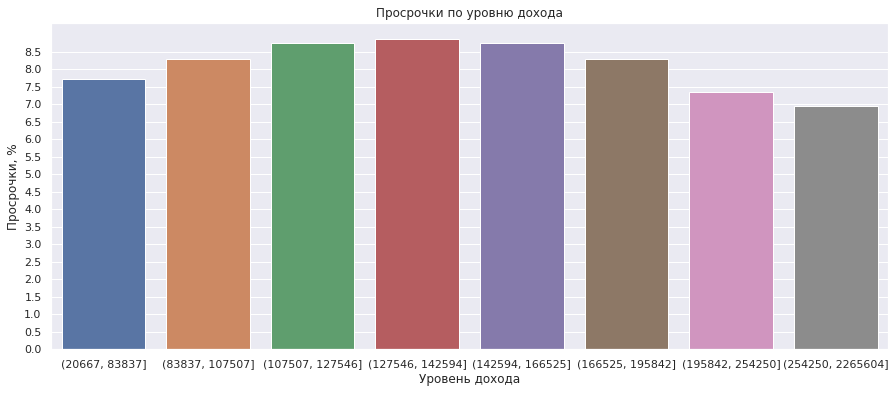

In [30]:
sb.set(rc={'figure.figsize':(15,6)})
chart = sb.barplot(data=table_df, x=table_df.index,
           y="Просрочки, %");
chart.set(title='Просрочки по уровню дохода');
chart.set_yticks(np.arange(0,max(table_df['Просрочки, %']),0.5));

**Вывод 2: При такой категоризации мы видим, что начиная со среднего уровня дохода наблюдается тенденция к снижению процента просрочек с увеличением дохода. Однако результаты при категоризации по предложенным A-B-C-D-E категориям, в частности, по категории А - противоречат данному утверждению.**

**Соответственно, единственным точным выводом считаю, что у клиентов категории дохода E больше всего просрочек (9.09%).**

### Как разные цели кредита влияют на его возврат в срок?

**Посмотрим в кредитах на какие цели чаще и реже всего допускаются просрочки**

In [31]:
debts = data.groupby('purpose')['debt'].mean().sort_values()
print(f'{list(debts.index)[0]} - меньше всего просрочек ({debts[0]:.2%}).')
print(f'{list(debts.index)[len(debts)-1]} - больше всего просрочек ({debts[len(debts)-1]:.2%}).')

покупка своего жилья - меньше всего просрочек (5.49%).
получение дополнительного образования - больше всего просрочек (11.49%).


**Посмотрим на статистику задолжностей по возврату кредитов в зависимости от категории цели кредита:**

In [32]:
table_df = data.pivot_table(
    index = ['purpose_category'], values = 'debt', aggfunc = ('mean', 'count')
)
table_df['count'] = table_df['count'].apply(round)
table_df = table_df.rename(columns={'count':'Клиентов','mean':'Просрочки'})
table_df.index.names = ['Категория цели кредита']
table_df.sort_values(by='Просрочки', ascending=False).style.format({'Просрочки': '{0:.2%}'})

,Клиентов,Просрочки
Категория цели кредита,,
операции с автомобилем,4279,9.35%
получение образования,3988,9.25%
проведение свадьбы,2313,7.91%
операции с недвижимостью,10751,7.26%


**Вывод: меньше всего просрочек допускается по кредитам на операции с недвижимостью (7.26%), а самые рискованые кредиты на цели, связанные с автомобилями (9.35%). Предполагаю, что т.к. автомобиль стоит дешевле, чем недвижимость, - большее количество заемщиков может получить на него кредит, а среди них будет и больше тех, кто допустит просрочки.**

In [33]:
df_data = []
df_data.append([
    'ВСЕГО КЛИЕНТОВ',
    len(data[data['purpose_category']=='операции с автомобилем']),
    len(data[data['purpose_category']=='операции с недвижимостью'])
])
for col,tp in data.dtypes.items():
    if col in ['purpose_category','purpose']:
        continue
    try:
        if tp == 'object':
            df_data.append([
                col,
                data[data['purpose_category']=='операции с автомобилем'][col].value_counts().index.tolist()[0],
                data[data['purpose_category']=='операции с недвижимостью'][col].value_counts().index.tolist()[0]
            ])
        else:
            df_data.append([
                col,
                data[data['purpose_category']=='операции с автомобилем'][col].median(),
                data[data['purpose_category']=='операции с недвижимостью'][col].median()
            ])
    except:
        pass

**Посмотрим чем отличаются клиенты, которые берут кредит на авто и на недвижимость:**

In [34]:
df = pd.DataFrame(df_data,columns=['','операции с автомобилем','операции с недвижимостью']);
display(df.style.hide_index())

,операции с автомобилем,операции с недвижимостью
ВСЕГО КЛИЕНТОВ,4279,10751
children,0.000000,0.000000
days_employed,2036.766689,1986.808526
dob_years,43.000000,42.000000
education,среднее,среднее
education_id,1.000000,1.000000
family_status,женат / замужем,женат / замужем
family_status_id,0.000000,0.000000
gender,F,F
income_type,сотрудник,сотрудник


**Вывод: по предоставленным данным, клиенты, которые берут кредит на недвижимость и клиенты, которые берут кредит на автомобили отличаются только количеством. Соответственно, либо просто чем больше кредитов, тем больше просрочек, - либо предоставленных данных недостаточно для того, чтобы сделать выводы о том, почему автокредиты менее надежны для банка.**

### Возможные причины появления пропусков в исходных данных

*Ответ:* 

**Предполагаю, что у банка просто нет этих данных (клиенты не предоставили, например).**


Данные отсутствовали в столбцах days_employed (общий трудовой стаж в днях) и total_income (ежемесячный доход), в одних и тех же строках, поэтому предполагаю, что возможно в базе данных банка, скорее всего, они взаимосвязаны.

#### Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных?

*Ответ:*

**Потому что медиана более устойчива к выбросам, чем среднее.**

## Общий вывод

**Мы обработали полученные от банка данные - удалили пропуски, обработали аномальные значения, дубликаты.**

Для выделения зависимостей мы дополнительно категоризировали данные о доходах и целях кредитования.

**Мы обнаружили, что все категории имеют зависимость с выплатой кредита в срок в той или иной мере:**
1. Клиенты без детей самые надежные с точки зрения выплаты кредитов в срок.
2. Следует с осторожностью относиться к клиентам, которые не состоят или не состояли в зарегистрированном браке, - они чаще допускают просрочки по кредитам.
3. Клиенты с категорией дохода «E» (до 30 000) имеют больше всего просрочек.
4. Меньше всего просрочек допускается по кредитам на операции с недвижимостью, а самые рискованые кредиты на цели, связанные с автомобилями.

**Самыми ненадежными клиентами являются люди не бывавшие в браке, с доходом категори E, 1 ребенком, которые берут кредит на операции с автомобилем.**

------


**«Идеальный клиент» банка для получения кредита - это вдовец/вдова без детей, доходом выше категории «E», который берет кредит на операции с недвижимостью.**

------

Рекомендации по улучшению качества данных:
- указать информацию о доходе и трудовом стаже всех клиентов;